In [2]:
import pandas as pd
test_df = pd.read_csv('/home/workspace/data/GLDv2/test/test.csv')
recognition_df = pd.read_csv('/home/workspace/data/GLDv2/test/recognition_solution_v2.1.csv')
retrieval_df = pd.read_csv('/home/workspace/data/GLDv2/test/retrieval_solution_v2.1.csv')

In [5]:
# GLDv2 데이터셋의 테스트 이미지는 117,577개 존재
test_df.head()

,id
0,00016575233bc956
1,0001aadbcd8cb923
2,0002c06b2440a5f9
3,0002eb1ee5a5a6b2
4,000594dad986513e


# recognition_solution_v2.1.csv 파일

In [7]:
recognition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117577 entries, 0 to 117576
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         117577 non-null  object
 1   landmarks  1972 non-null    object
 2   Usage      117577 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [8]:
recognition_df.head()

,id,landmarks,Usage
0,e324e0f3e6d9e504,NaN,Private
1,d9e17c5f3e0c47b3,NaN,Private
2,1a748a755ed67512,NaN,Public
3,537bf9bdfccdafea,NaN,Private
4,13f4c974274ee08b,NaN,Private


In [ ]:
# index 데이터의 랜드마크 종류는 849개(NaN 제외)
len(recognition_df['landmarks'].unique())

850

In [12]:
recognition_df['Usage'].unique()

array(['Private', 'Public'], dtype=object)

# retrieval_solution_v2.1.csv 파일

In [11]:
retrieval_df.head()

,id,images,Usage
0,a1788046694b0213,NaN,Ignored
1,c0b46342f2ccd446,NaN,Ignored
2,d6058caf9827c742,NaN,Ignored
3,7a303b25b701c535,NaN,Ignored
4,938d53db837e3113,NaN,Ignored


In [16]:
retrieval_df.groupby('id')['images'].count().sort_values(ascending=False)

id
2dd0ce2f451c3c59    1
325fa94b54b482c2    1
6245135a4874c62e    1
36051cd89ec9ff65    1
13832898cde5741f    1
                   ..
5562d54c0e25291a    0
5562b4fa7b1abb24    0
5561f449587e95a8    0
5561ebe6448aefc1    0
55692766d471a888    0
Name: images, Length: 117577, dtype: int64

In [22]:
retrieval_df[retrieval_df['images'].notna()]

,id,images,Usage
20,9265ec6df51a366e,13b75d49867d477d 39cfce5ff10cb8f6 47a85cbcf849...,Public
74,67e40359b5e315cc,0abcae3d89059199 0f76cdc8baa4d8c3 156c8606cafa...,Private
279,58b7fad17f7d0cf5,3302f54d4a85173a 4995a5b67235ae47 5ad6bdf31ae5...,Public
364,f176e0fe5888f2d4,141125628b4ae151 307cdfaf4a2c85b9 3a00c1b715f3...,Private
1103,8d13fa3a2ed54167,fc116d940ebbd83b,Private
...,...,...,...
117371,e57bd722f4e7bc54,06d975ebbc55a5bd 0a77d60a70f269b4 0cfa45c5d156...,Private
117416,5551c2a604e9f9b5,105a4cc88fdee0eb 1290ff0b7d9d02cc 163036f92df6...,Private
117426,9bc57c3a8848628d,0d1e8805158b5b74,Public
117514,1e1409a3a161413d,00b73fe87acaea5f 08f7111488547a70 0a37a5c07d28...,Public


In [27]:
retrieval_custom_df = (
    retrieval_df
    .assign(images=retrieval_df["images"].str.split())   # ['3b75d4…', '39cfce…', …]
    .explode("images")                        # 각 파일명이 독립 행으로
    .reset_index(drop=True)
)


In [28]:
retrieval_custom_df

,id,images,Usage
0,a1788046694b0213,NaN,Ignored
1,c0b46342f2ccd446,NaN,Ignored
2,d6058caf9827c742,NaN,Ignored
3,7a303b25b701c535,NaN,Ignored
4,938d53db837e3113,NaN,Ignored
...,...,...,...
131581,5cf2b107215f6422,NaN,Ignored
131582,47ffd1eb787f0751,NaN,Ignored
131583,a960115b6648c6c8,NaN,Ignored
131584,63ddeea9ac4bb681,NaN,Ignored


In [29]:
retrieval_custom_df[retrieval_custom_df['images'].notna()]

,id,images,Usage
20,9265ec6df51a366e,13b75d49867d477d,Public
21,9265ec6df51a366e,39cfce5ff10cb8f6,Public
22,9265ec6df51a366e,47a85cbcf8498050,Public
23,9265ec6df51a366e,4ec41677d8c53e8d,Public
24,9265ec6df51a366e,86a9a6e34db800a5,Public
...,...,...,...
131562,3100ffe8273aad77,0eecdb06234899e6,Private
131563,3100ffe8273aad77,0f838afa7e5f60f8,Private
131564,3100ffe8273aad77,a4b78784f2d1f7c5,Private
131565,3100ffe8273aad77,eadf07e1de03610f,Private


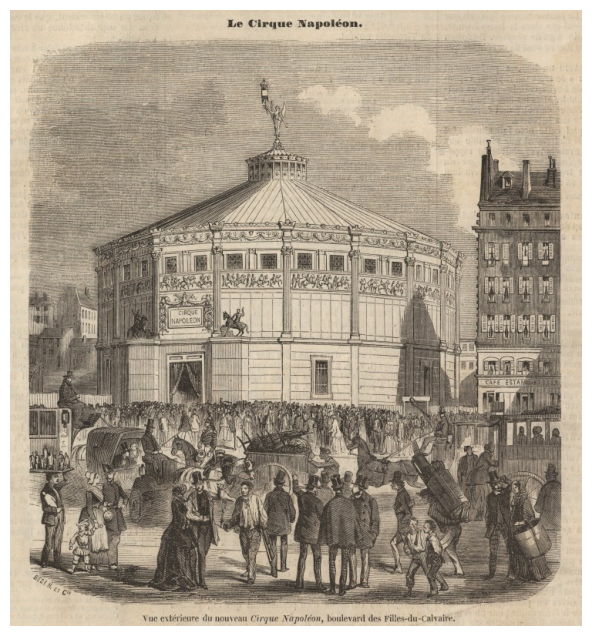

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = '/home/workspace/data/GLDv2/index/image/1/3/b/13b75d49867d477d.jpg'

# 이미지 읽기 및 시각화
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

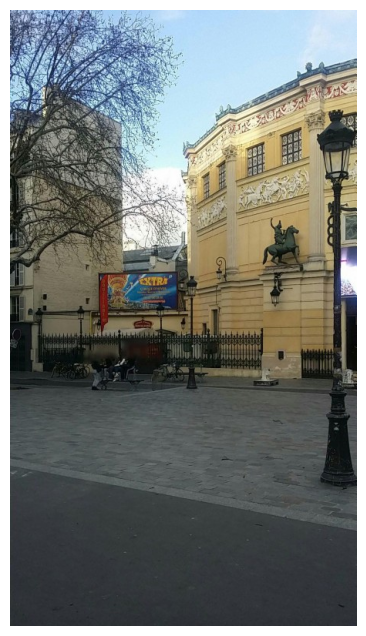

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = '/home/workspace/data/GLDv2/test/image/9/2/6/9265ec6df51a366e.jpg'

# 이미지 읽기 및 시각화
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()